In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools
from scipy.spatial.distance import cdist

In [2]:
def kde_encodermap(projected, figname):
    
    sns.set_style('darkgrid')

    fig, ax = plt.subplots()

    sns.kdeplot(data=projected_df, x='x', y='y', hue='Simulation', fill=True, 
                bw_adjust=0.1, legend=False)

#     ax.set_title("", fontsize=2)
#     ax.set_xlabel('x', fontsize=20)
#     ax.set_ylabel('y', fontsize=20)

#     for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#         label.set_fontsize(18)

#     plt.subplots_adjust(top=0.985, bottom=0.08, left=0.047, right=0.992, hspace=0.2, wspace=0.2)

    plt.show()

   # fig.savefig("{}.png".format(figname), dpi=320)

In [3]:
def covered_area(projected, interval):
    hist, xedges, yedges = np.histogram2d(projected[interval[0]:interval[1], 0],
                                          projected[interval[0]:interval[1], 1], bins=250)
    area_covered = sum(sum(hist != 0))

    return area_covered

In [4]:
def hist_plot_projected(projected, interval):
    hist, xedges, yedges = np.histogram2d(projected[interval[0]:interval[1], 0],
                                          projected[interval[0]:interval[1], 1], bins=250)

    fig1, axe1 = plt.subplots()

    caxe = axe1.imshow(-np.log(hist.T), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                       aspect="auto")
    cbar = fig1.colorbar(caxe)
    cbar.set_label("-ln(p)", labelpad=0)

    plt.show()

In [5]:
def minima_hist_projected(projected, interval, threshold, bins, figname):
    
    sns.set_style('darkgrid')
    
    hist, xedges, yedges = np.histogram2d(projected[interval[0]:interval[1], 0],
                                          projected[interval[0]:interval[1], 1], bins=bins)

    log_hist = -np.log(hist)

    x, y, lnp = [], [], []

    for i in range(0, bins):
        for j in range(0, bins):
            if log_hist[i, j] <= threshold:
                x.append((xedges[i] + xedges[i + 1]) / 2)
                y.append((yedges[j] + yedges[j + 1]) / 2)
                lnp.append(log_hist[i, j])

    fig, axe = plt.subplots(figsize=(10, 10))

    caxe = axe.imshow(-np.log(hist.T), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                      aspect="auto")
    cbar = fig.colorbar(caxe)
    cbar.set_label("-ln(p)", labelpad=0)
    
    print(f'Number of minima: {len(x)}')
    minima = pd.DataFrame({'X': x, 'Y': y, 'ln(P)': lnp}).sort_values(by='ln(P)', 
                                                                      ignore_index=True)
    
    plt.scatter(x, y, marker='x', s=50, c='green')

    plt.subplots_adjust(top=0.979, bottom=0.035, left=0.024, right=1.0, hspace=0.25, wspace=0.225)

    plt.show()

    fig.savefig("{}.png".format(figname), dpi=320)
    
    return minima

In [6]:
def common_area(projected1, projected2, bins):
    hist1, xedges1, yedges1 = np.histogram2d(projected1[:, 0], projected1[:, 1], bins=bins)
    hist2, xedges2, yedges2 = np.histogram2d(projected2[:, 0], projected2[:, 1], bins=bins)

    common_area_value = 0

    for i in range(0, bins):
        for j in range(0, bins):
            if hist1[i, j] != 0 and hist2[i, j] != 0:
                common_area_value += 1

    return common_area_value

## Projected DataFrame

### MD

In [7]:
projected = np.load("../ionic_strength/projected_wt_k_ionic_strength.npy")

projected_df = pd.DataFrame({'x': projected[0:, 0], 'y': projected[0:, 1]})
projected_df_wt = pd.DataFrame({'x': projected[0:10002, 0], 'y': projected[0:10002, 1]})
projected_df_k = pd.DataFrame({'x': projected[10003:, 0], 'y': projected[10003:, 1]})

projected_df['Simulation'] = np.repeat(['wt 0mM', 'wt 150mM', 'K141E 0mM', 'K141E 165mM'],
                                       [5001, 5001, 5001, 5001])
projected_df_wt['Simulation'] = np.repeat(['wt 0mM', 'wt 150mM'], [5001, 5001])
projected_df_k['Simulation'] = np.repeat(['K141E 0mM', 'K141E 165mM'], [5000, 5001])

projected_df_wt_150mM = pd.DataFrame({'x': projected[5001:10002, 0], 'y': projected[5001:10002, 1]})  
projected_df_wt_150mM['Simulation'] = np.repeat(['wt 150mM'], [5001])

projected_df_k_165mM = pd.DataFrame({'x': projected[15003:, 0], 'y': projected[15003:, 1]})  
projected_df_k_165mM['Simulation'] = np.repeat(['K141E 165mM'], [5001])

### TREMD

In [9]:
projected = np.load("../ionic_strength/projected_wt_k_tremd_0mM_165mM.npy")

projected_df = pd.DataFrame({'x': projected[0:, 0], 'y': projected[0:, 1]})

projected_df['Simulation'] = np.repeat(['wt 0 mM', 'K141E 0 mM', 'wt 165 mM', 'K141E 165 mM'],
                                       [15001, 15001, 1001, 1001])

In [8]:
len(projected_df['x'])

2002

### Plot

<AxesSubplot:xlabel='x', ylabel='y'>

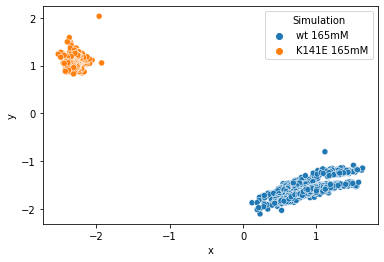

In [9]:
sns.scatterplot(data=projected_df, x='x', y='y', hue='Simulation', legend=True)

In [27]:
projected_df.loc[projected_df['Simulation'] == 'wt 150mM']

,x,y,Simulation
0,0.615520,-1.050119,wt 150mM
1,0.596843,-1.054610,wt 150mM
2,0.559231,-1.056323,wt 150mM
3,0.622648,-1.051414,wt 150mM
4,0.631626,-1.062515,wt 150mM
...,...,...,...
1035,2.422979,-0.400940,wt 150mM
1036,2.480710,-0.445242,wt 150mM
1037,2.375354,-0.330229,wt 150mM
1038,2.315958,-0.315468,wt 150mM


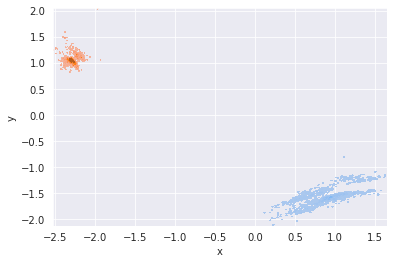

In [10]:
kde_encodermap(projected_df, "KDE_encodermap_wt_k_tremd_single_structure")

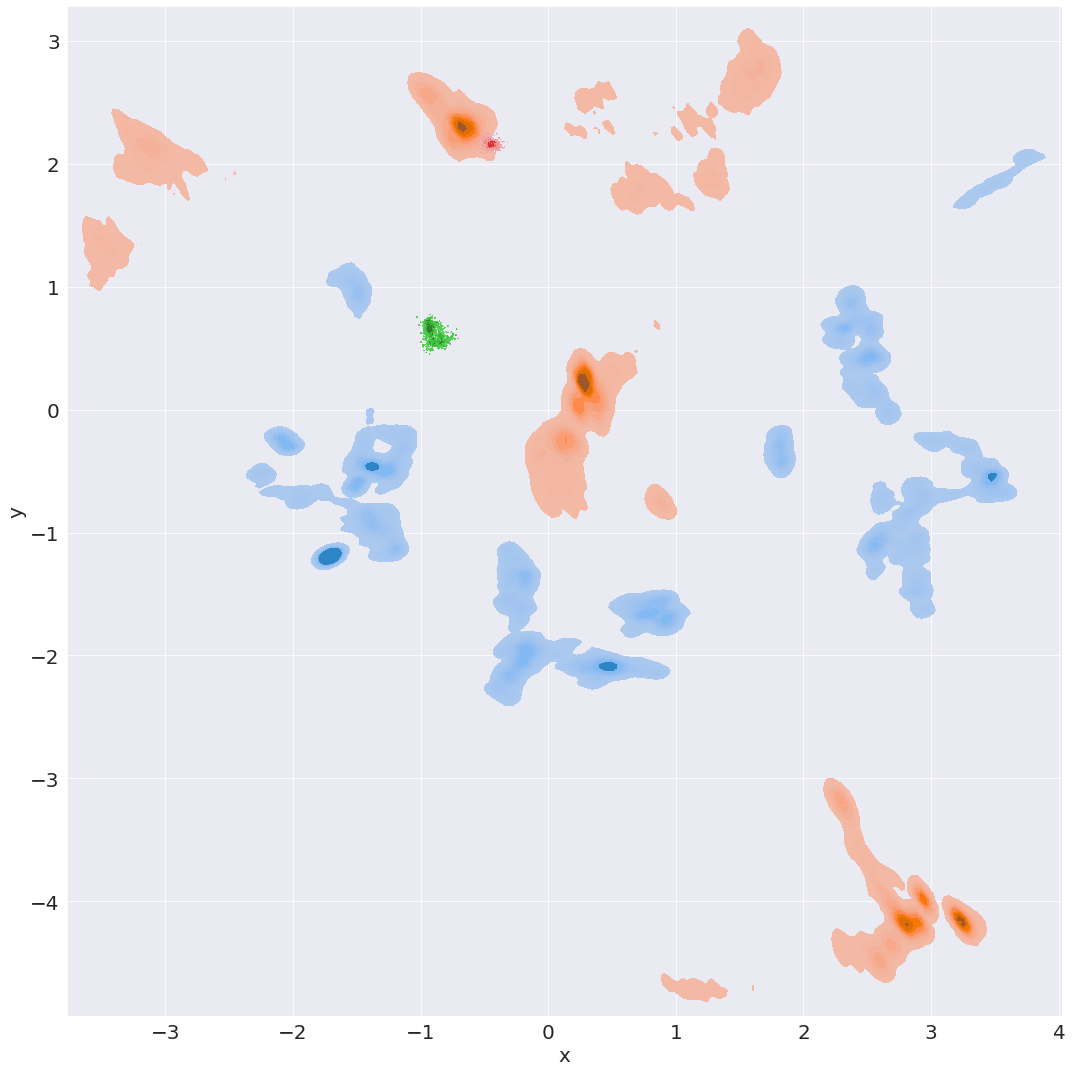

In [12]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(15, 15))

sns.kdeplot(data=projected_df.loc[(projected_df['Simulation'] == 'wt 0 mM')], 
            x='x', y='y', fill=True, 
            bw_adjust=0.1, legend=True)

sns.kdeplot(data=projected_df.loc[(projected_df['Simulation'] == 'K141E 0 mM')], 
            x='x', y='y', fill=True, 
            bw_adjust=0.1, legend=True)

sns.kdeplot(data=projected_df.loc[(projected_df['Simulation'] == 'wt 165 mM')], 
            x='x', y='y', fill=True, 
            bw_adjust=0.1, legend=True)

sns.kdeplot(data=projected_df.loc[(projected_df['Simulation'] == 'K141E 165 mM')], 
            x='x', y='y', fill=True, 
            bw_adjust=0.1, legend=True)

ax.set_title("", fontsize=2)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)
    
plt.tight_layout()
    
fig.savefig('KDE_encodermap_wt_k_tremd_0mM_165mM.png', dpi=320)

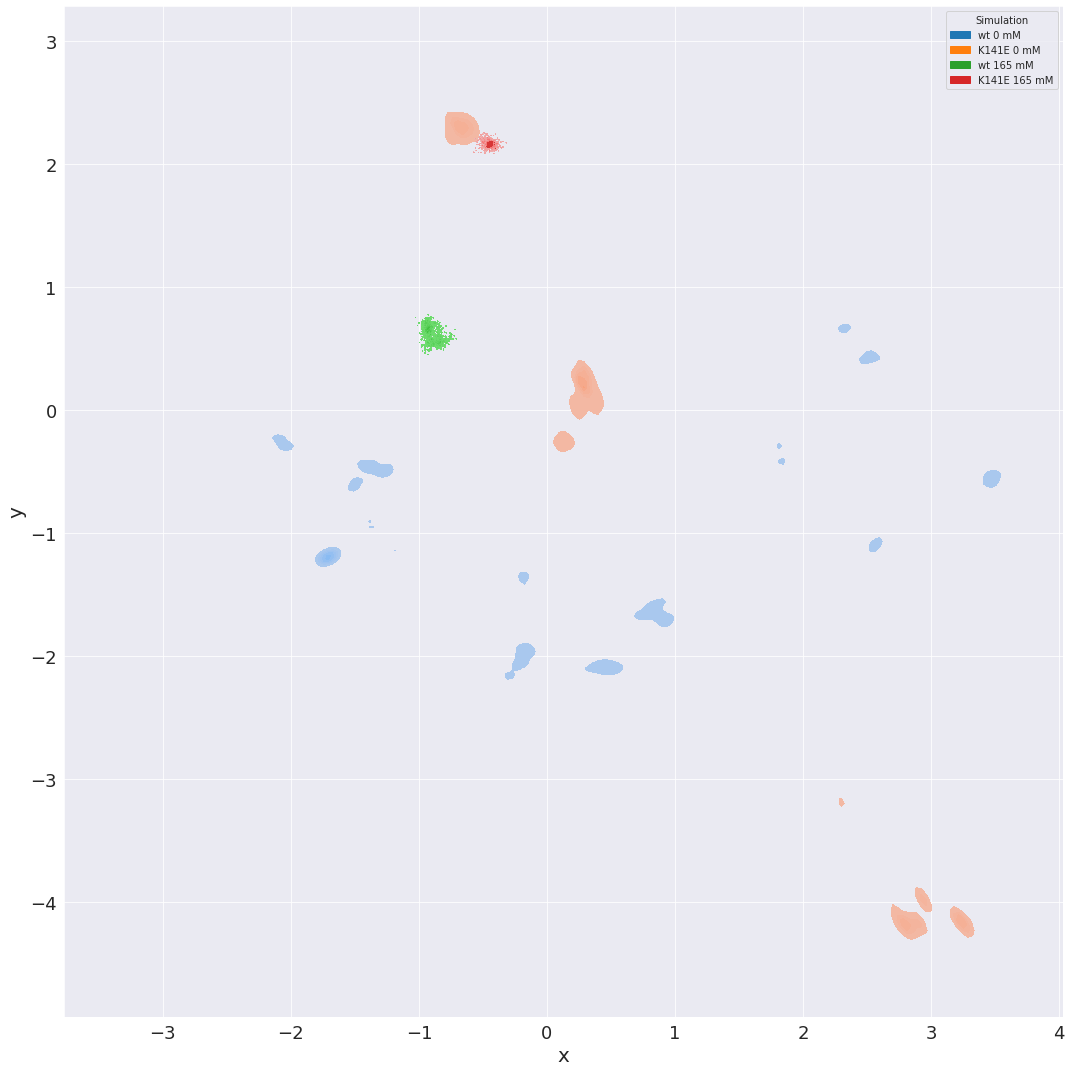

In [13]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(15, 15))

sns.kdeplot(data=projected_df, x='x', y='y', 
            hue='Simulation', fill=True, 
            bw_adjust=0.1, legend=True)

# sns.kdeplot(data=projected_df.loc[(projected_df['Simulation'] == 'wt 165mM')], 
#             x='x', y='y', fill=True, 
#             bw_adjust=0.1, legend=True)

# sns.kdeplot(data=projected_df.loc[(projected_df['Simulation'] == 'K141E 165mM')], 
#             x='x', y='y', fill=True, 
#             bw_adjust=0.1, legend=True)

ax.set_title("", fontsize=2)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(18)
    
plt.tight_layout()
    
# fig.savefig('KDE_encodermap_wt_k_tremd_0mM_165mM_legend.png', dpi=320)

### Number of minima

/tmp/ipykernel_18871/780908840.py:8: RuntimeWarning: divide by zero encountered in log
  log_hist = -np.log(hist)
/tmp/ipykernel_18871/780908840.py:21: RuntimeWarning: divide by zero encountered in log
  caxe = axe.imshow(-np.log(hist.T), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
/tmp/ipykernel_18871/780908840.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(caxe)


Number of minima: 2


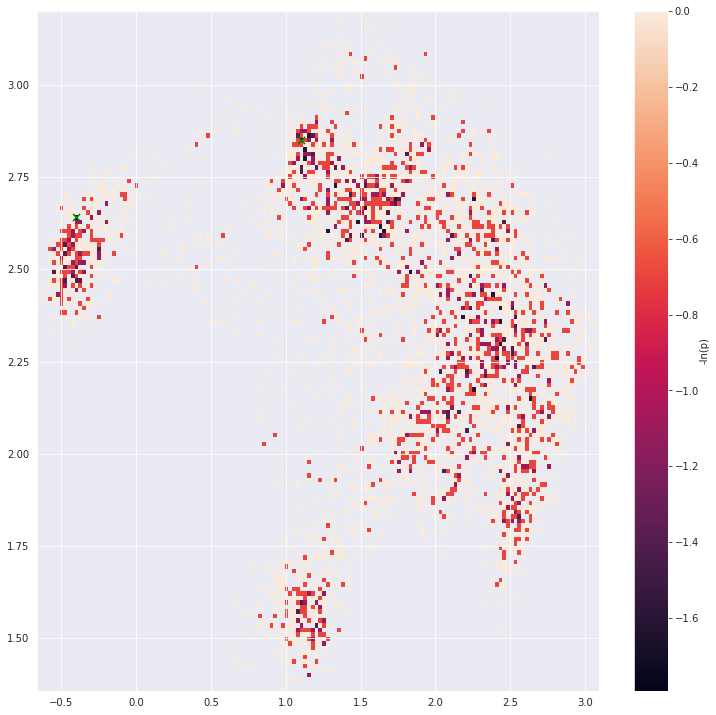

In [14]:
# IONIC STRENGTH
minima_wt_150mM = minima_hist_projected(projected, [5001, 10002], threshold=-1.7, bins=150, figname='minima_encodermap_wt_150mM')

/tmp/ipykernel_18871/780908840.py:8: RuntimeWarning: divide by zero encountered in log
  log_hist = -np.log(hist)
/tmp/ipykernel_18871/780908840.py:21: RuntimeWarning: divide by zero encountered in log
  caxe = axe.imshow(-np.log(hist.T), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
/tmp/ipykernel_18871/780908840.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(caxe)


Number of minima: 1


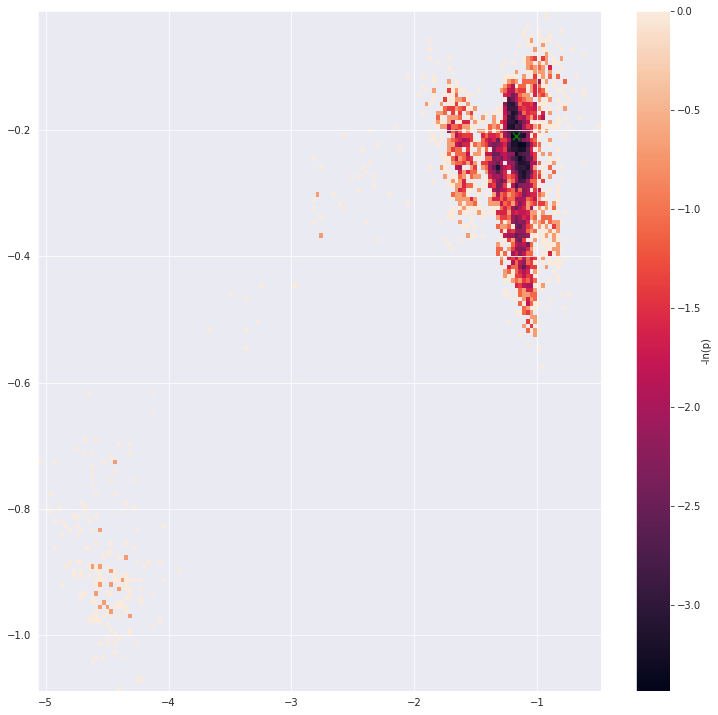

In [24]:
minima_k_165mM = minima_hist_projected(projected, [15003, 20004], threshold=-3.43, bins=150, figname='minima_encodermap_k_165mM')    

In [39]:
X_wt_150mM = np.array(minima_wt_150mM['X'].iloc[1])
Y_wt_150mM = np.array(minima_wt_150mM['Y'].iloc[1])

X_k_165mM = np.array(minima_k_165mM['X'].iloc[0])
Y_k_165mM = np.array(minima_k_165mM['Y'].iloc[0])

x_wt_150mM = np.array(projected_df_wt_150mM['x'])
y_wt_150mM = np.array(projected_df_wt_150mM['y'])

x_k_165mM = np.array(projected_df_k_165mM['x'])
y_k_165mM = np.array(projected_df_k_165mM['y'])

In [38]:
print(X_k_165mM)
print(Y_k_165mM)

-1.1696530014276505
-0.2091633553306262


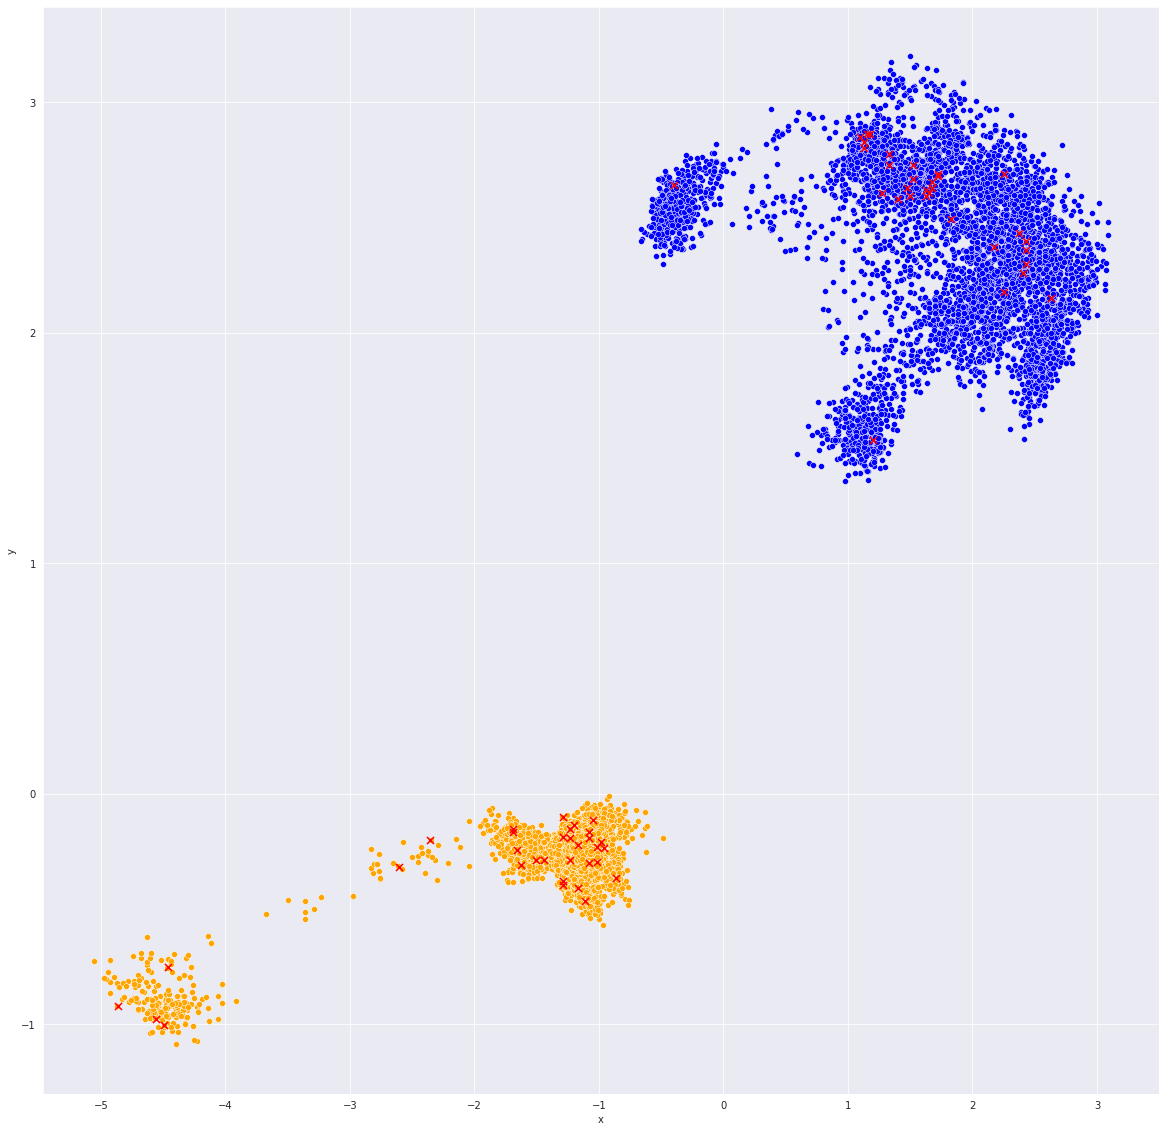

In [89]:
fig, axe = plt.subplots(figsize=(20, 20))

X_wt_150mM = np.array(minima_wt_150mM['X'].iloc[0:32])
Y_wt_150mM = np.array(minima_wt_150mM['Y'].iloc[0:32])

# Select structures from different points of the K141E islands, to give more variability
# k_values = np.random.randint(1335, size=32)
k_values = np.array([1159, 1132, 1160,  191,   16, 1169,  567, 1218, 1016,  639,  907,
       1106,  320, 1212, 1074, 1183,  372,  361,  386,   56, 1319,  876,
       1002,   25, 1094,  866,  248,  357,  179,  602,  440,  335])

X_k_165mM = np.array(minima_k_165mM['X'].iloc[k_values])
Y_k_165mM = np.array(minima_k_165mM['Y'].iloc[k_values])

X_k_165mM[-1] = minima_k_165mM['X'].iloc[761]
Y_k_165mM[-1] = minima_k_165mM['Y'].iloc[761]

x_wt_150mM = np.array(projected_df_wt_150mM['x'])
y_wt_150mM = np.array(projected_df_wt_150mM['y'])

x_k_165mM = np.array(projected_df_k_165mM['x'])
y_k_165mM = np.array(projected_df_k_165mM['y'])

sns.scatterplot(data=projected_df_wt_150mM, x='x', y='y', color='blue', legend=True)
plt.scatter(X_wt_150mM, Y_wt_150mM, marker='x', s=50, c='red')

sns.scatterplot(data=projected_df_k_165mM, x='x', y='y', color='orange', legend=True)
plt.scatter(X_k_165mM, Y_k_165mM, marker='x', s=50, c='red')


In [43]:
# Obtain frames corresponding to Encodermap minima (bin coordinates closest to projected data)
frames_min_wt_150mM, frames_min_k_165mM = [], []

frames_min_wt_150mM.append(cdist([[X_wt_150mM, Y_wt_150mM]], np.array([x_wt_150mM, y_wt_150mM]).T, metric='euclidean').argmin() + 1)  
frames_min_k_165mM.append(cdist([[X_k_165mM, Y_k_165mM]], np.array([x_k_165mM, y_k_165mM]).T, metric='euclidean').argmin() + 1)

pd.DataFrame(frames_min_wt_150mM).to_csv("./frames_min_wt_150mM_single.csv", header=None, index=None, sep= ',')
pd.DataFrame(frames_min_k_165mM).to_csv("./frames_min_k_165mM_single.csv", header=None, index=None, sep= ',')

#### Paroxetine

In [ ]:
# wt
minima_hist_projected(projected, [0, 65001], threshold=-5, bins=250, figname='minima_encodermap_wt')

# K141E
minima_hist_projected(projected, [65001, 110002], threshold=-5, bins=250, figname='minima_encodermap_k')

# wt + paroxetina
minima_hist_projected(projected, [110002, 175003], threshold=-5, bins=250, figname='minima_encodermap_wt_parox')

# K141E + paroxetina
minima_hist_projected(projected, [175003, 220004], threshold=-5, bins=250, figname='minima_encodermap_k_parox')


### Covered Area

In [ ]:
# wt
print(covered_area(projected, [0, 65001]))

# K141E
print(covered_area(projected, [65001, 130002]))

# wt + paroxetina
print(covered_area(projected, [130002, 175003]))

# K141E + paroxetina
print(covered_area(projected, [175003, 220004]))

### Common Area

In [ ]:
projected_wt = projected[0:65001, :]
projected_wt_paroxetine = projected[130002:175003, :]

projected_k = projected[65001:130002, :]
projected_k_paroxetine = projected[175003:220004, :]

common_area_wt = common_area(projected_wt, projected_wt_paroxetine, bins=250)
common_area_k = common_area(projected_k, projected_k_paroxetine, bins=250)
common_area_wt_k = common_area(projected_wt, projected_k, bins=250)
common_area_wt_k_paroxetine = common_area(projected_k_paroxetine, projected_wt, bins=250)

print(common_area_wt_k_paroxetine)